In [0]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

     |████████████████████████████████| 2.9MB 4.8MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings



# import warnings
warnings.filterwarnings('ignore')

In [0]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df= pd.read_sql_query('select * from lifeexpectancy', con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [0]:
#explore the dataset
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [0]:
#checking for null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [0]:
#change the column names to a more standard format(all lower case) and no gaps
orig_columns=list(df.columns)
new_columns=[]
for col in orig_columns:
  new_columns.append(col.strip().replace('  ',' ').replace(' ','_').lower())
df.columns=new_columns
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [0]:
#describe the data
df.describe()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [0]:
#number of columns
print((f'Number of columns:{len(df.columns)}'))

Number of columns:22


In [0]:
# Show all columns in roww format by transposing
df[:10].T.head(22)

,0,1,2,3,4,5,6,7,8,9
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
status,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing
life_expectancy,65,59.9,59.9,59.5,59.2,58.8,58.6,58.1,57.5,57.3
adult_mortality,263,271,268,272,275,279,281,287,295,295
infant_deaths,62,64,66,69,71,74,77,80,82,84
alcohol,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03
percentage_expenditure,71.2796,73.5236,73.2192,78.1842,7.09711,79.6794,56.7622,25.8739,10.9102,17.1715
hepatitis_b,65,62,64,67,68,66,63,64,63,64
measles,1154,492,430,2787,3013,1989,2861,1599,1141,1990


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under-five_deaths                  2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria                         2919 non-null float64
hiv/aids                           2938 non-null

In [0]:
# filling nan with different methods to figure out the best approach
#fill by mean
df2_bymean=df.copy()
#fill by country
df3_bycountry=df.copy()
#fill by interpolation
df4_byinterp=df.copy()


#countries and columns with numeric type
countries=df2_bymean["country"].unique()
na_columns=[  'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles',
       'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
#fillna with mean of entire column
#single imputation
for col in na_columns:
      df2_bymean[col].fillna(df2_bymean[col].mean(), inplace=True)


#fillna with mean by country
for col in na_columns:
  for country in countries:
    df3_bycountry.loc[df3_bycountry["country"]==country, col]=df3_bycountry.loc[df3_bycountry["country"]==country,col].fillna(df3_bycountry[df3_bycountry["country"]==country][col].mean())



#deleted by person infant deaths, percentage expenditure, under_five_deaths, hiv/aids, .why


#interpolate 
for col in na_columns:
  df4_byinterp.loc[:,col]=df4_byinterp.loc[:,col].interpolate(limit_direction="both")

In [0]:
#cchecking for nulls
dfs=[df, df2_bymean, df3_bycountry, df4_byinterp]
df_names=["df", "df2_bymean", "df3_bycountry", "df4_byinterp"]

for name, df in zip(df_names, dfs):
  print("-"*50)
  print(f'nulls for {name}')
  print("-"*50)
  print(df.isnull().sum())

--------------------------------------------------
nulls for df
--------------------------------------------------
country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64
--------------

In [0]:
#I will use intepolation because all null values are eliminated and because it's time series data.


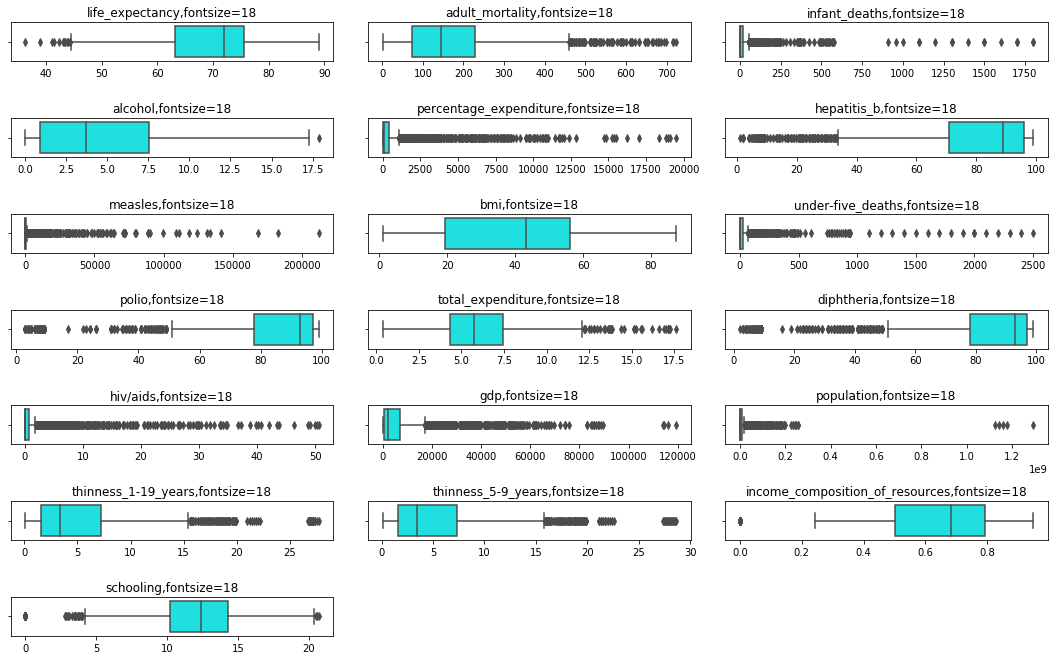

In [0]:
#Detecting otliers.
#We draw the boxplot to detect outliers
plt.figure(figsize=(15,25))
for i, col in enumerate(na_columns):
  plt.subplot(len(na_columns), 3, i+1)
  sns.boxplot(df4_byinterp[col], color=('cyan'))
  plt.title(f'{col},fontsize=18')
  plt.xlabel('')

plt.tight_layout()
plt.show()

In [0]:
#We can see a significant amount of outliers for most variables

In [0]:
#Using a histogram to explore the distribution of the data because of the year attribute

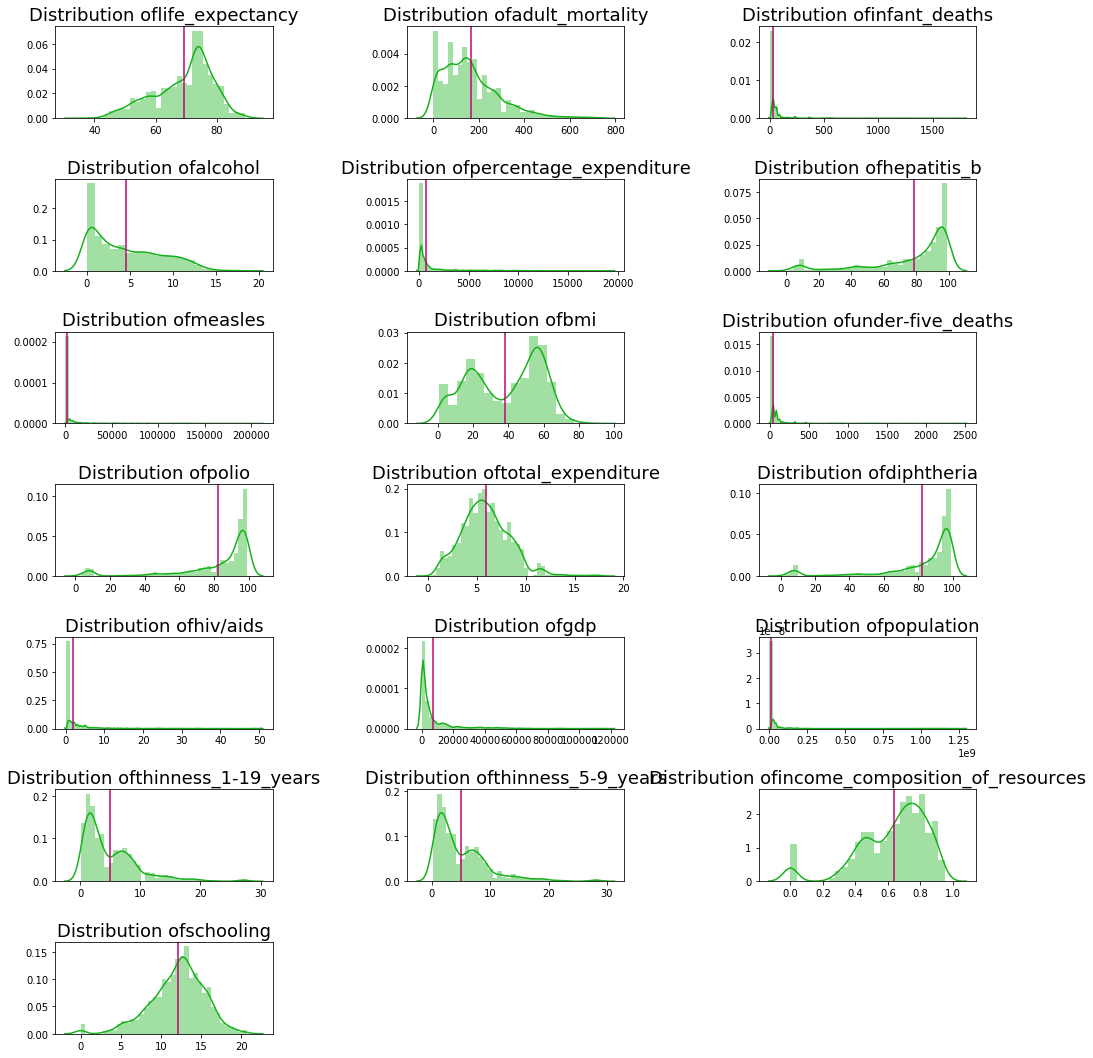

In [0]:
plt.figure(figsize=(15,40))

for i, col in enumerate(na_columns):
  plt.subplot(len(na_columns), 3, i+1)
  sns.distplot(df4_byinterp[col], color=('xkcd:green'))
  plt.title(f'Distribution of{col}', fontsize=18)
  plt.xlabel('')
  plt.axvline(df4_byinterp.loc[:,col].mean(), color=('xkcd:magenta'))
plt.tight_layout()
plt.show()


In [0]:
#Observations
# We can see that several the impact of outliers severely affecting many variables for example the dinfant deaths, HIV AIDS, population, percentage expenditure etc.
#We proceed with winsorization to deal with the outliers.
df4_byinterp["winz_life_exp"]=winsorize(df4_byinterp['life_expectancy'], (.10, 0.0))
df4_byinterp["winz_adult_mort"]=winsorize(df4_byinterp["adult_mortality"], (0, .10))
df4_byinterp["winz_inf_deaths"]=winsorize(df4_byinterp['infant_deaths'], (0, .15))
df4_byinterp["winz_alc"]=winsorize(df4_byinterp['alcohol'], (0.0, .05))
df4_byinterp["winz_perc_exp"]=winsorize(df4_byinterp['percentage_expenditure'], (0.0, .15))
df4_byinterp["winz_hepat"]=winsorize(df4_byinterp['hepatitis_b'], (.15,0.0))
df4_byinterp["winz_measles"]=winsorize(df4_byinterp['measles'], (0.0, .15))
#bmi will not be winsorized
df4_byinterp["winz_under5_deaths"]=winsorize(df4_byinterp['under-five_deaths'], (0.0, .2))
df4_byinterp["winz_polio"]=winsorize(df4_byinterp['polio'], (.15, 0))
df4_byinterp["winz_total_exp"]=winsorize(df4_byinterp['total_expenditure'], (0.0, .10))
df4_byinterp["winz_hiv/aids"]=winsorize(df4_byinterp['hiv/aids'], (0.0, .20))
df4_byinterp["winz_dipth"]=winsorize(df4_byinterp['diphtheria'], (0.15, 0.0))
df4_byinterp["winz_gdp"]=winsorize(df4_byinterp['gdp'], (0.0, 0.2))
df4_byinterp["winz_population"]=winsorize(df4_byinterp['population'], (0.0, .20))
df4_byinterp["winz_total_exp"]=winsorize(df4_byinterp['total_expenditure'], (0.0, .10))
df4_byinterp["winz_thin_1_9"]=winsorize(df4_byinterp['thinness_1-19_years'], (0.0, .15))
df4_byinterp["winz_thin_5_9"]=winsorize(df4_byinterp['thinness_5-9_years'], (0.0, .15))
df4_byinterp["winz_income_comp"]=winsorize(df4_byinterp['income_composition_of_resources'], (.05, 0.0))
df4_byinterp["winz_schooling"]=winsorize(df4_byinterp['schooling'], (.05, .05))

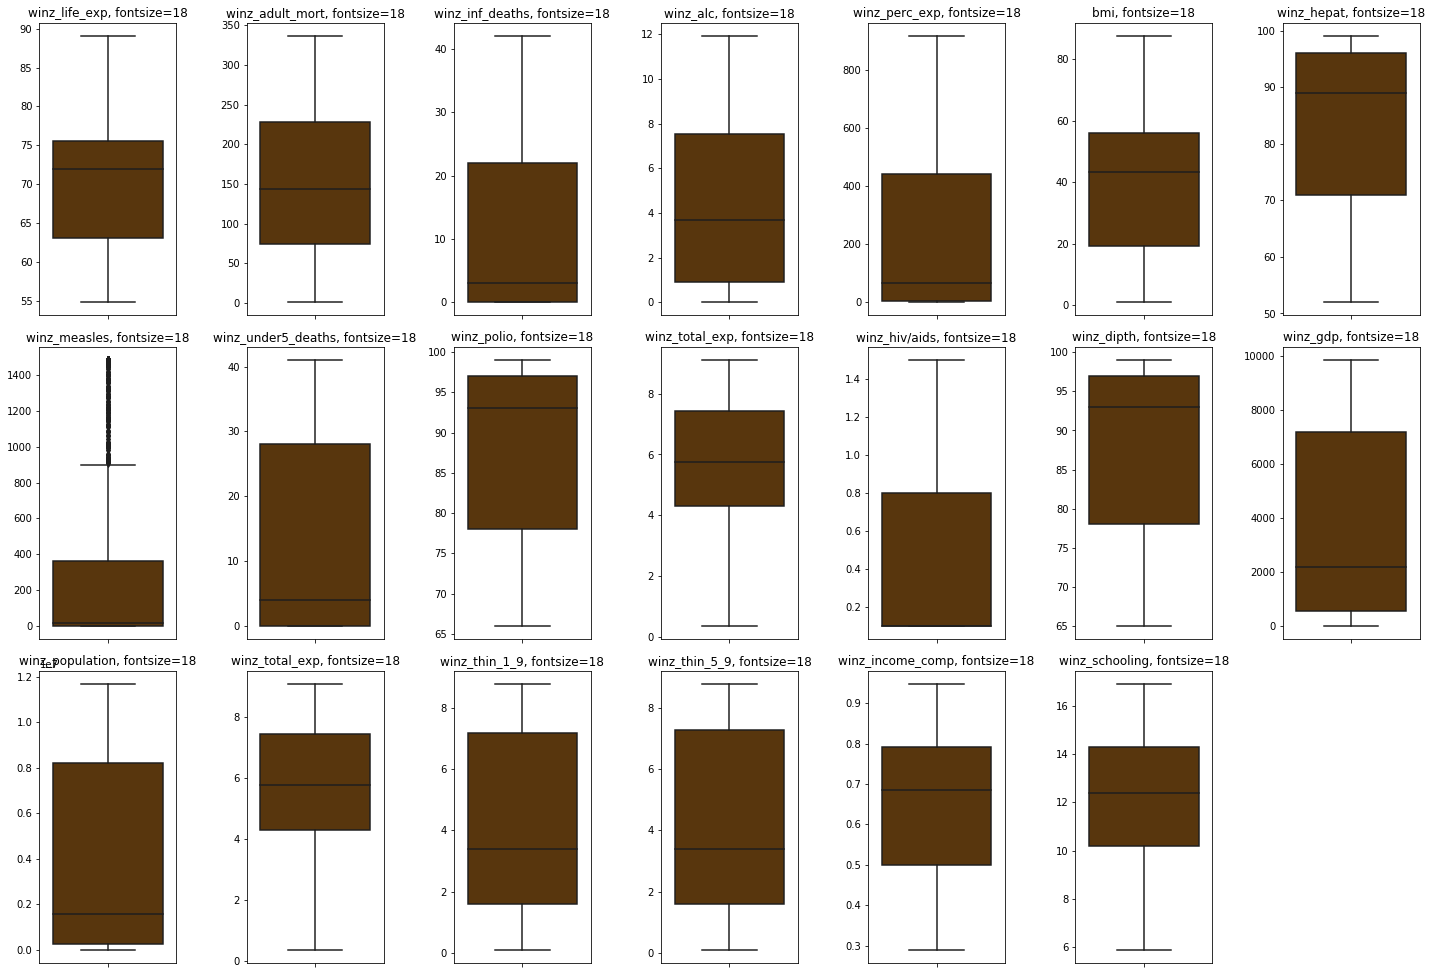

In [0]:
#checking our dataset after treating outliers
adj_columns=["winz_life_exp","winz_adult_mort","winz_inf_deaths","winz_alc","winz_perc_exp", "bmi","winz_hepat",
             "winz_measles","winz_under5_deaths","winz_polio","winz_total_exp","winz_hiv/aids","winz_dipth",
             "winz_gdp","winz_population","winz_total_exp","winz_thin_1_9","winz_thin_5_9","winz_income_comp",
             "winz_schooling"]
            
plt.figure(figsize=(20,90))

for i,col in  enumerate(adj_columns):
  plt.subplot(len(adj_columns), 7, i+1)
  sns.boxplot(y=df4_byinterp[col], color=('xkcd:brown'))
  plt.title(f'{col}, fontsize=18')
  plt.ylabel('')

plt.tight_layout()
plt.show()

In [0]:
# We have effectively dealt with outliers

In [0]:
#look at the new distribution of the variables
plt.figure(figsize=(15,40))

for i, col in enumerate(adj_columns):
  plt.subplot(len(adj_columns), 3, i+1)
  sns.distplot(df4_byinterp[col], color=('xkcd:green'))
  plt.title(f'Distribution of{col}', fontsize=18)
  plt.xlabel('')
  plt.axvline(df4_byinterp.loc[:,col].mean(), color=('xkcd:magenta'))
plt.tight_layout()
plt.show()

In [0]:
# univariate and multivarate analysis

In [0]:
new_data_columns=df4_byinterp[["year","status","country","winz_life_exp","winz_adult_mort","winz_inf_deaths","winz_alc","winz_perc_exp", "bmi","winz_hepat",
             "winz_measles","winz_under5_deaths","winz_polio","winz_total_exp","winz_hiv/aids","winz_dipth",
             "winz_gdp","winz_population","winz_thin_1_9","winz_thin_5_9","winz_income_comp",
             "winz_schooling"]].corr()


plt.figure(figsize=(15,12))
sns.heatmap(new_data_columns, square=True, annot=True, cmap='viridis')

Analysyis
Our target variable is **life expectancy**. Judging from our heatmap and the previous graphic analysis, coupled with our understanding of the subject, I chose the following parameters that have the colsest relationship with the target variable for feature engineering:
(I chose a correlation threshold coefficient of 0.4)

*   Alcohol
*   percentage expenditure
*   bmi
*   polio immunization coverage
*   diphtheria
*   GDP
*   Income composition of resources
*   schooling
*   status




In [0]:
#Life expectancy of developing vs developed countries
plt.barh(df4_byinterp["status"].unique(),
         df4_byinterp.groupby(["status"])["country"].nunique(),
         color=["red","violet"],
         tick_label=["Developed", "Developing"],
         #title("Expectancy of Developing Vs Developed Countries")
         )
plt.title("Life Expectancy of Developing Vs Developed Countries")

In [0]:
focus_cols=["winz_alc","winz_perc_exp", "bmi" ,"winz_polio" ,"winz_dipth",
             "winz_gdp","winz_income_comp",
             "winz_schooling"]
plt.figure(figsize=(15,40))
for i, col in enumerate(focus_cols):
  plt.subplot(len(focus_cols), 3, i+1)
  plt.scatter(df4_byinterp[col], df4_byinterp['winz_life_exp'])
  plt.title(f'Scatter plot for {col}', fontsize=18)
  plt.xlabel(focus_cols[i])
  plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

# Analysis and Conclusion
From the scatter plot matrix we can see that life expectancy is bery closely related to several of the selected attributes especially the Income Composition of Resources, Number of Years of Schooling, BMI and Alcohol among others. From here we would move on to the next stage of modeling using the features selected to investigate which algorithms are most appropriate.


This analysis has broken down the different steps required in data wrangling from cleaning, exploration and feature engineering with the purpose of obtaining high quality data for modeling and futher analysis.